In [63]:
import numpy as np
import pandas as pd

In [64]:
#read the dataset here
Property_details = pd.read_csv('Property_details.csv', encoding="windows_1258") # Please use your path and dataset for this parts!
Order_details = pd.read_csv('Order_details.csv', encoding="windows_1258")

## Question 1

#### Part (a): How many properties are there in the region with the zip code of 84100? 
#### Part (b): What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84100?


In [67]:
#(1a)
## Convert values in the zipcode to string from float
Property_details['zipcode'] = Property_details['zipcode'].astype(str).apply(lambda x: x.replace('.0',''))
### Create a df of properties with 84100 and count the properties using propertyid
zip_84100_df = Property_details[Property_details.zipcode=='84100']
len(zip_84100_df['propertyid'].unique()) ## Count properties

print(f"There are  {len(zip_84100_df['propertyid'].unique())} properties in the zipcode 84100")

There are  52 properties in the zipcode 84100


In [68]:
#(1b)
## Get statistical summary of the column starrating
print(f'There mean of starrating is {zip_84100_df.starrating.mean()} in the zip code 84100')
print(f'There standard deviation of starrating is {zip_84100_df.starrating.std()}  in the zip code 84100')
print(f'There minimum starrating is {zip_84100_df.starrating.min()}  in the zip code 84100')
print(f'There maximum starrating is {zip_84100_df.starrating.max()}  in the zip code 84100')



There mean of starrating is 2.8461538461538463 in the zip code 84100
There standard deviation of starrating is 0.7510676161988106  in the zip code 84100
There minimum starrating is 2  in the zip code 84100
There maximum starrating is 4  in the zip code 84100


## Question 2

 #### Part (a): Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Friday”).
#### Part (b): Which "weekday" does receive the most reservation? 


In [69]:
#(2a)
### Convert reservation date to date datatype
Order_details['reservation date'] = pd.to_datetime(Order_details['reservation date'])
### Create new column of weekday names from reservation date attribute
Order_details['weekday'] = Order_details['reservation date'].dt.day_name()
### Peek at the data
Order_details[['reservation date','weekday',]].head()

,reservation date,weekday
0,2019-11-02,Saturday
1,2019-11-30,Saturday
2,2019-12-20,Friday
3,2019-12-28,Saturday
4,2019-12-28,Saturday


In [70]:
#(2b)
### GET THE FREQUENCY OF THE WEEK DAYS to get the day with the most reservation 
Order_details.weekday.value_counts()

Thursday     26589
Monday       26539
Tuesday      24275
Wednesday    24082
Sunday       23030
Friday       20784
Saturday     20574
Name: weekday, dtype: int64

In [71]:
print('Mondays and Thursdays receive the highest number of reservations')


Mondays and Thursdays receive the highest number of reservations


## Question 3

#### Part (a): In “roomamenities”, what are the top 10 common room amenities? What about the 10 least common room amenities? ( for example, Air conditioning is one amenity)
#### Part (b): What percentage does each type of room amenities occupy of the total number of reservations for all properties?（do not use the total number of amenities as denominator）


In [72]:
# You can deceide whether to display you output for 3(a) and 3(b) separately or together
## Create a dataframe of amenities y defining ; as the  separator
roomamenities_df= Order_details['roomamenities'].str.split(";", expand = True)
roomamenities_df = pd.DataFrame(roomamenities_df)

### make the dataframe a single column, drop any empty columns and covert everything to string
roomamenities_df = roomamenities_df.apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

## Remove colons from the word
roomamenities_df = roomamenities_df.replace(': ', '')

## Count items and store them in a df
from collections import Counter

items_df = pd.DataFrame(Counter(" ".join(roomamenities_df).split(",")).items())

## Rename columns
items_df['Item'] = items_df[0]
items_df['Frequency'] = items_df[1]
items_df = items_df[['Item', 'Frequency']]
items_df.head(n = 10)

,Item,Frequency
0,Air conditioning:,12068
1,Alarm clock:,39956
2,Carpeting:,71189
3,Closet:,113368
4,Coffee/tea maker:,78582
5,Desk:,114593
6,DVD/CD player:,6732
7,Fan:,20398
8,Free Wi-Fi in all rooms!:,157613
9,Hair dryer:,127316


In [73]:
# If you displayed your output of 3(b) together with 3(a) please delete this chunk
items_df['percentage'] = items_df.Frequency/len(Order_details.propertycode)
items_df = items_df.sort_values(by=['Frequency'], ascending=False)
items_df.head(n = 10)

,Item,Frequency,percentage
11,In-room safe box:,161054,0.970948
8,Free Wi-Fi in all rooms!:,157613,0.950203
19,Air conditioning:,145902,0.879601
9,Hair dryer:,127316,0.767551
16,Toiletries:,119993,0.723403
10,Heating:,119196,0.718598
5,Desk:,114593,0.690848
34,Telephone:,113827,0.686230
3,Closet:,113368,0.683463
17,Towels:,106225,0.640400


## Question 4

#### Part (a): For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

#### Part (b): For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Mx_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [74]:
#4(a)
## median onsite price
Order_details.onsiteprice.median()
### fIND zero valued onsite prices and replace them with the median oniste price
Order_details['replacedonsiteprice'] = Order_details['onsiteprice'].replace(0, Order_details.onsiteprice.median())

### Peek at the data
Order_details['replacedonsiteprice'].head()


0     82.36
1    636.09
2    591.74
3    881.48
4    897.53
Name: replacedonsiteprice, dtype: float64

In [75]:
#4(b)
## subset the max and min values for each property
price_df = Order_details.groupby('propertycode').agg(
    # Get max of the duration column for each group
    Maximum=('replacedonsiteprice', max),
    # Get min of the duration column for each group
    Minimum=('replacedonsiteprice', min)
)

###  normalize maximum price

price_df ['num'] = price_df ['Maximum'] - min(price_df ['Maximum'])
price_df ['den'] = max(price_df ['Maximum']) - min(price_df ['Maximum'])

price_df['norm_maximum'] = price_df['num']/price_df['den']

## drop the unnecessary columns 
price_df  = price_df.drop(['num', 'den'], axis=1)

#export to csv
price_df.to_csv('Mx_Min Price.csv')

## Question 5

#### Part (a): A family of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 3 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .
#### Part (b): If this family does not want to pay a room for a “replaced onsiteprice” higher than 150 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 150 due to price fluctuation. 


In [76]:
#5(a) 
# combine the two df
df = pd.merge(Property_details ,Order_details,left_on='propertyid',right_on='propertycode')
#Get df for max occupacy of 3 or more
max_occupacy_df = df[df.maxoccupancy >= 3]  
##Get hotels
max_occupacy_df = max_occupacy_df[max_occupacy_df.propertytype == "Hotels"] 
## Those that are not occupied
max_occupacy_df = max_occupacy_df[max_occupacy_df.closed == "N"]
## Hotel blocks that have not been sold out
max_occupacy_df = max_occupacy_df[max_occupacy_df.hotelblock != 'Sold out']
## Count unique property id numbers
print(f"There are  {len(max_occupacy_df['propertyid'].unique())} available hotels.")

There are  3085 available hotels.


In [77]:
#5(b)
max_occupacy_df = max_occupacy_df[max_occupacy_df.replacedonsiteprice <= 150]

## Count unique property id numbers
print(f"There are  {len(max_occupacy_df['propertyid'].unique())} available hotels that have a price lower than or equal to 150.")

There are  2103 available hotels that have a price lower than or equal to 150.


## Bonus Question (merge data, filter, groupby, merge three times)
####  Part (a): For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.
#### Part (b): For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

#### Hint: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [78]:
#(a) 
avg_df = (df.groupby(['country', 'propertyid'])['replacedonsiteprice']
         .agg([np.mean])
         .add_suffix('_replacedonsiteprice')
         .reset_index())

df1 = df[['propertyid', 'propertyname', 'city', 'zipcode', 'address']]

df2 = avg_df.groupby('country').max().reset_index()

exp_df = pd.merge(df1,df2,on='propertyid').drop_duplicates()

exp_df

,propertyid,propertyname,city,zipcode,address,country,mean_replacedonsiteprice
0,7307410,Peitche Lauer,Useldange,8706,4 AmTremel,Luxembourg,285.215000
3,7388882,Hotel Bratislava,Bratislava,82103,Seberiniho 9,Slovakia,234.076667
35,7621602,ibis Tallinn Center,Tallinn,10132,Juhkentali 28,Estonia,193.548636
63,7646542,Ble Mavi studio- BED & BREAKFAST - Adults only,Vouni,4772,Ellados 3,Cyprus,302.820000
64,7796793,Puntukas,Kuciai,29132,15 A. Baranausko aikste,Lithuania,297.371667
72,8166773,Motel One Linz,Linz,4020,10 Hauptplatz,Austria,655.020000
74,8342605,Baobab Suites,Siofok,8600,23 Batthyany Lajos utca,Hungary,3231.450000
86,8422960,Hotel Breeze Amsterdam,Amsterdam,nan,Bert Haanstrakade 1074 Hoek Krijn Taconiskade,Netherlands,394.116333
106,8444824,Estate Marjetin dom,Idrija,5280,Dole 16B,Slovenia,224.741826
113,8521875,Teatterihotelli Riihimaki,Hyvinkaa,11100,Hameenaukio 1,Finland,512.370000


In [79]:
#(b) 
df3 = avg_df.groupby('country').min().reset_index()

cheapest_df= pd.merge(df1,df3,on='propertyid').drop_duplicates()

cheapest_df

,propertyid,propertyname,city,zipcode,address,country,mean_replacedonsiteprice
0,2016,Scandic Park,Stockholm,nan,Karlavagen 43,Sweden,43.330000
26,2202,Radisson Blu Sky Hotel Tallinn,Tallinn,10143,Ravala Street 3,Estonia,84.365714
48,834,Radisson Blu Resort,St. Julian's,nan,St. Georges Bay,Malta,49.173699
102,91719,Aston Hotel,Bratislava,nan,Bajkalska 22,Slovakia,33.656000
110,96945,Hotel Jezero,Bohinjsko Jezero,4265,Ribcev Laz 51,Slovenia,40.370000
117,97,Amba Hotel Charing Cross,London,nan,The Strand,United Kingdom,31.140000
139,989,Novotel Eindhoven,Eindhoven,5657,Anthony Fokkerweg 101,Netherlands,47.190000
165,2756,Mercure Poznan Hotel,Poznan,nan,ul rooseveltast 20,Poland,21.420000
219,287,Hotel Mercure Beaune Centre,Beaune,21200,7 Avenue Charles De Gaulle,France,33.150000
253,2962,Les Nations Hotel,Geneva,1202,62 Grand Pre street,Switzerland,48.665000


## Part 2 (9 Points):

For this part, we look at the logic and how you solve the problems. 

***Part 2-a:*** 

    1- You need to find "5" interesting business questions based on the datasets.     
    2- Write Python code to answer the questions.    
    3- Visualize your results. 
    

***Part 2-b:***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (2 points)
    2. You need to answer these five questions using Python and the datasets. (2 points)
    3. You need to have at least "5" graphs to visualize your insights. (2 points)
    4. Your executive summary of your answers is well-written and makes sense. (2 points)
    5. Your business insights are very interesting and the report is creative. (1 points)


**(You need to use this cell to write your 5 questions)**

**Question 1:** Which 10 cities are the most frequented cities in the world ?

**Question 2:** How do prices compare with max occupancy in the 100 most frequented cities ?

**Question 3:** How do discounts compare with max occupancy in the 100 most frequented cities ?

**Question 4:** What is the general distribution of star rating of this cities ?

**Question 5:** Which hotels are most frequented in the 10 cities ?

In [80]:
### Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\RODGER~1\AppData\Local\Temp/ipykernel_4136/844757833.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_10['city'] = cities_10['city']


Text(0.5, 1.0, 'Top 10 most Frequented(Reserved) Cities in the World')

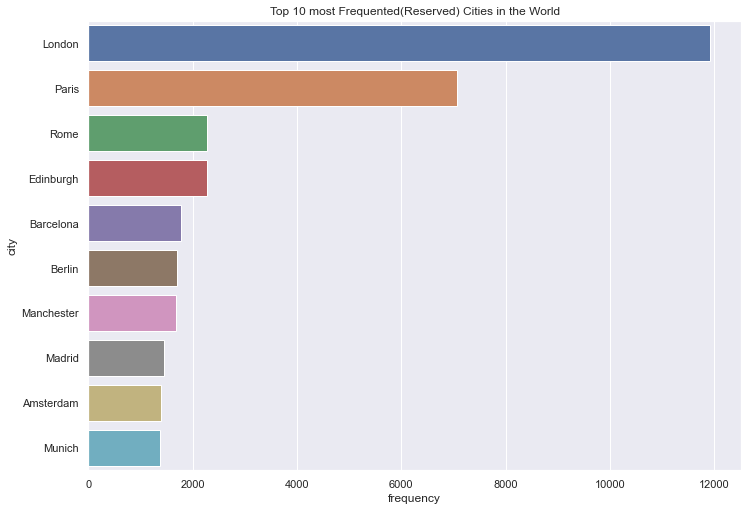

In [81]:
# Your code to answer Question 1
## Create df that will be used for the question(s)
#business_df = df[['propertyid', 'propertyname', 'city', 'propertytype', 'starrating', 'maxoccupancy', 'discount', 'weekday', 'replacedonsiteprice']]
## Convert to category
df[['propertyid', 'propertyname', 'city', 'propertytype', 'maxoccupancy', 'weekday']] = df[['propertyid', 'propertyname', 'city', 'propertytype', 'maxoccupancy', 'weekday']].apply(lambda x: x.astype('category'))
#Which 10 cities are the most frequented cities in the world ?
cities_df = df[['propertyid', 'city', 'propertyname', 'starrating', 'maxoccupancy', 'discount', 'weekday', 'replacedonsiteprice']]
frequent_cities = cities_df['city'].value_counts().reset_index()
frequent_cities = pd.DataFrame(frequent_cities)

frequent_cities = frequent_cities.rename({'index': 'city', 'city': 'frequency'}, axis=1)
frequent_cities.city = frequent_cities['city'].astype(str)
cities_10 = frequent_cities.head(n = 10)
cities_10['city'] = cities_10['city']

## Plot
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y='city',x='frequency',data=cities_10)
plt.title("Top 10 most Frequented(Reserved) Cities in the World")

Text(0.5, 1.0, 'Prices aganst max occupancy in the 10 most frequented cities')

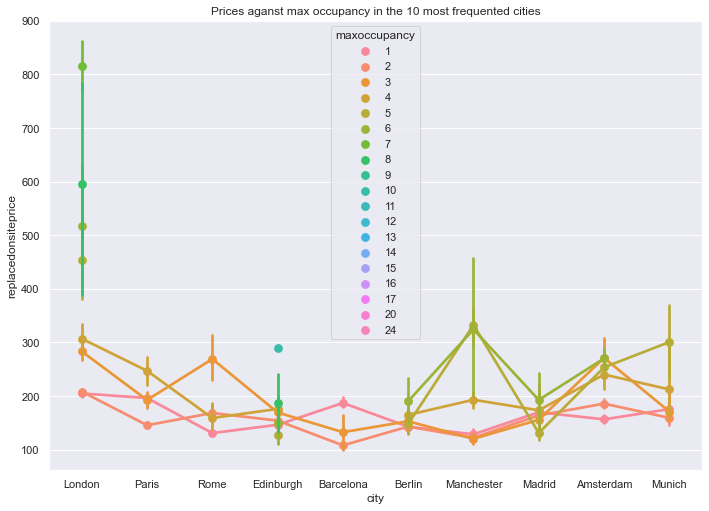

In [82]:
# Your code to answer Question 2
cities_10 = frequent_cities.head(n = 10)
cities_10_df = pd.merge(cities_10, cities_df, on="city")
#How do prices compare with max occupancy in the 10 most frequented cities ?
sns.pointplot(x='city',y='replacedonsiteprice',data=cities_10_df, hue='maxoccupancy')
plt.title("Prices aganst max occupancy in the 10 most frequented cities")

Text(0.5, 1.0, 'Prices aganst max occupancy in the 10 most frequented cities')

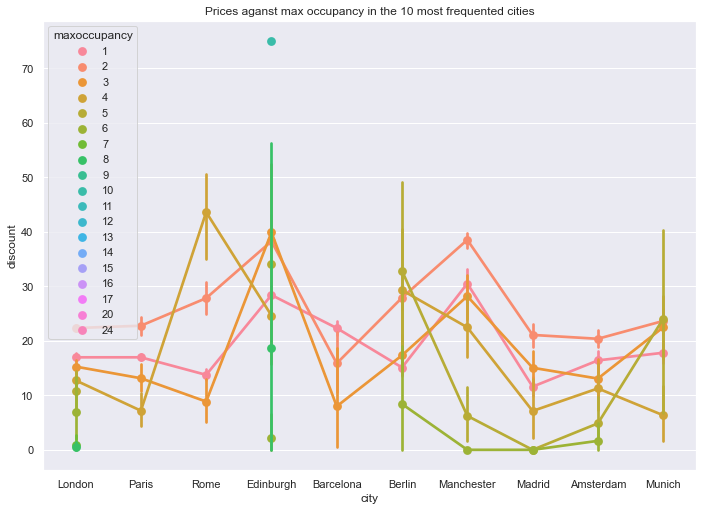

In [83]:
# Your code to answer Question 3
#How do prices compare with max occupancy in the 10 most frequented cities ?
sns.pointplot(x='city',y='discount',data=cities_10_df, hue='maxoccupancy')
plt.title("Prices aganst max occupancy in the 10 most frequented cities")

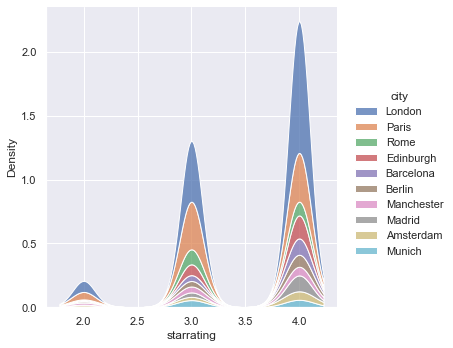

In [84]:
# Your code to answer Question 4
#What is the general distribution of star rating of this cities ?
sns.displot(cities_10_df, x="starrating", hue="city", kind="kde", multiple="stack")


<AxesSubplot:xlabel='frequency', ylabel='hotel'>

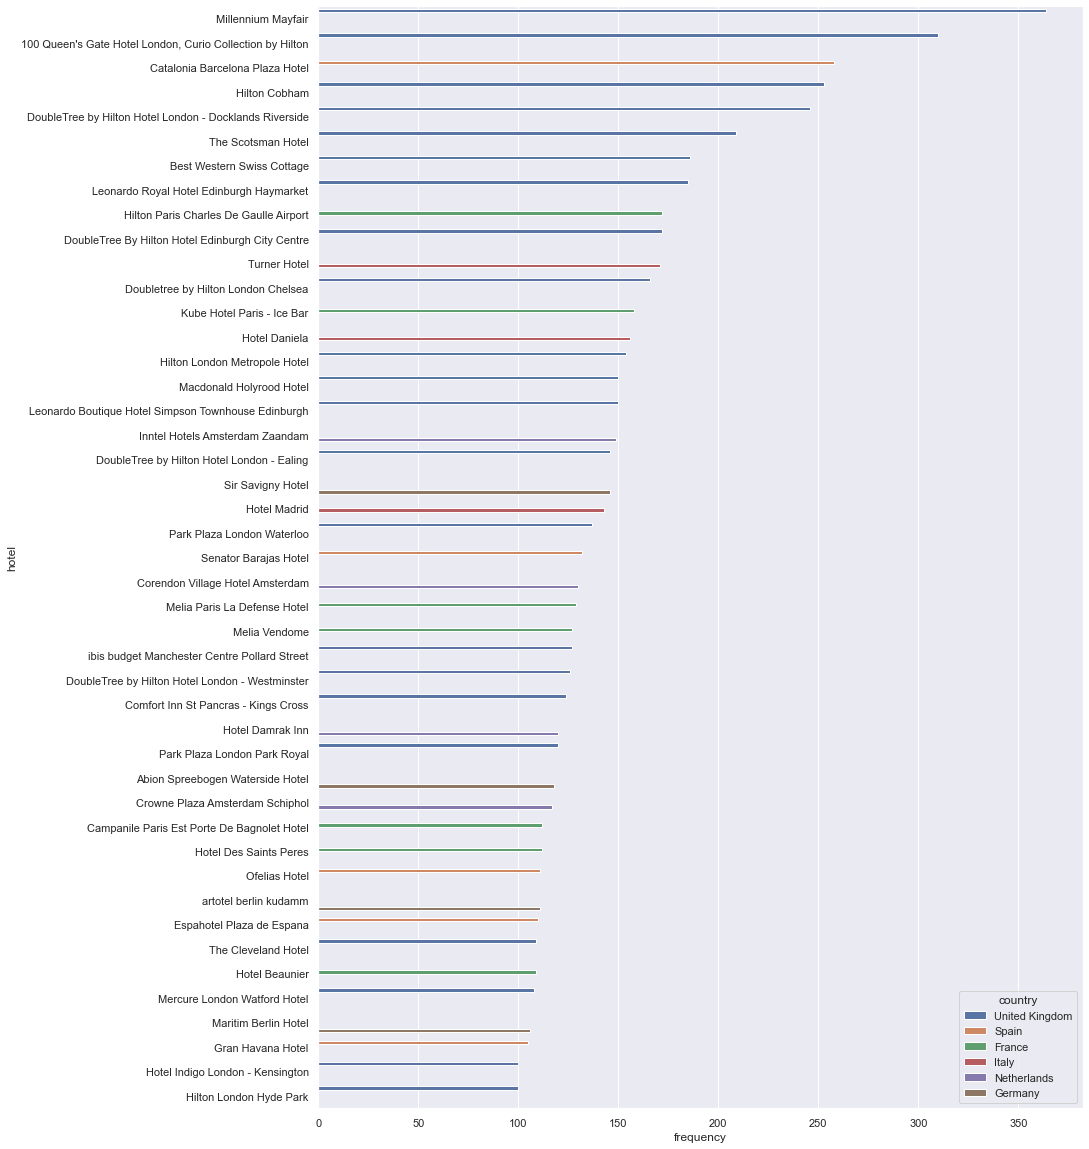

In [104]:
# Your code to answer Question 5
hotels_top = cities_10_df.propertyname.value_counts().reset_index()
hotels_top = pd.DataFrame(hotels_top)

hotels_top = hotels_top.rename({'index': 'hotel', 'propertyname': 'frequency'}, axis=1)

df[['propertyname', 'country']]

hotels_top_100 = hotels_top[hotels_top.frequency >=100]

property_df = df[['propertyname', 'country']]

hotels = pd.merge(hotels_top_100, property_df, left_on="hotel", right_on="propertyname")

hotels = hotels.drop('propertyname', axis=1)

hotels['hotel']  = hotels['hotel'].astype(str)

sns.set(rc={'figure.figsize':(13.7,20.27)})

sns.barplot(y='hotel',x='frequency',hue='country',data=hotels)

## Executive Summary & Business insights:


**(You need to use the cell below to write your executive summary & business insights)**
Note: If you need more space use enter to go to the next line.


## Question 1
The approach taken for thsi assignment was to look at the best performing cities in the world, and try to benchmark with them to determine which aspects of the recorded data, made them to be reserved in the world. London and Paris had the most orders to reserve hotels when compared to the other hotels. It is important to note that there is a huge gap between the reservations made in the first two cities, when compared to the rest of the cities. 

## Question 2
The second step was to look into the price differences of hotels in the top 10 cities that were set aside in the first step. Since prices are also impacted by the max occupancy of the property. From the plot, note that London offers property with occupancy that goes beyond 6. However, the prices for this property, the prices are also very high. For the rest of property with max occupancy less than 6, the prices are generally the same, except for Edinburg amd Barcelona, the two cities are cheaper.

## Question 3
The next comparison between the 10 cities was that of discounts against max occupancy rooms. London seems to offer the lowest discounts on the property with large max occupancy such as that of 6. London when compared to the rest of the cities generally gives the lowest discounts on the various max occupancy of the property. Manchester and Edinburg offer the highest discounts on room with maximum occupancy from 1 to 3. It is also important to note that hotels in Edinburg, Munich and Berlin, offer  a range of discounts from very discounts to very large discounts.

## Question 4
London, Paris and Edinburg appear to have ratings that range from 2 to offer, with London and Edinburg having the highest number of hotels in all the cities with the various ratings. This however, might not reflect the actual case because London  has the highest number of hotels in the dataset being considered. So far we can conclude that Edinburg is the best city to make a reservation and or set up a hospitality business.

## Question 5
Note that the hotels with reservations that are over 100 are mostly from the United Kingdom. Out of the top ten hotels only two are from outside the United Kingdomm, one from Spain and the other from France.

PART 1 - Question Points: 
1a - 2 points;
1b - 1 point;
2a - 3 points;
2b - 2 points;
3a - 3 points;
3b - 1 point;
4a - 3 points;
4b - 4 points;
5a - 3 points;
5b - 3 points;
Bonus(a) - 1 point;
Bonus(b) - 1 point;

PART 2 - 
9 points total


Good Luck!